In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem A

In [119]:
def inverse_distribution(n, given_lambda):
    return - np.log(1.0 - n) / given_lambda

In [120]:
def generate_enqueue_and_completition_intervals(N, lambda_a, lambda_d):
    n = np.random.uniform(0, 1, N)
    c_t = inverse_cdf(n, lambda_a)
    q_t = inverse_cdf(n, lambda_d)
    return c_t, q_t

In [204]:
class LabeledObject:
    label = "label"
    val = 0.0
    def __init__(self, label, val):
        self.val = val
        self.label = label

In [205]:
def generate_arrival_and_delivery_times(N, c_t, q_t):
    A = [c_t[0]] 
    for i in range(1, N):
        A = np.append(A, A[i-1] + c_t[i])
    D = [c_t[0]+q_t[0]] 
    for i in range(1, N):
        D = np.append(D, max(D[i - 1], A[i]) + q_t[i])
    return A, D

In [245]:
def generate_queue(AD):
    AD.sort(key=lambda x: x.val)
    queue = [0]
    for ad in AD:
        if ad.label == "A":
            queue.append(queue[-1] + 1)
        else:
            queue.append(queue[-1] - 1)
    return queue

[0.54371237 1.58624534 2.24798078 2.78089217 3.30997696 3.85706936
 5.4777425  5.52116638 5.59918909 5.62398084]
[0.97868227 2.42027172 2.94966006 3.37598918 3.79925701 4.29474328
 6.77428102 6.80902012 6.87143829 6.89127169]


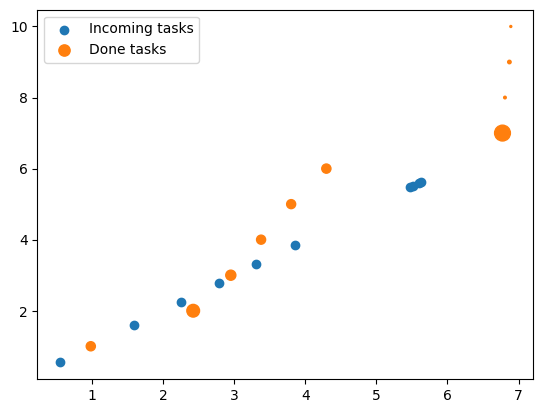

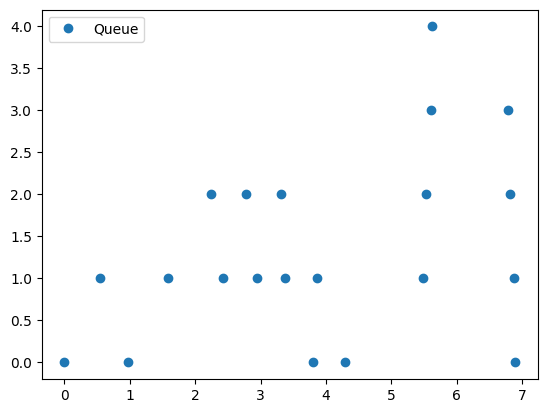

In [250]:
N = 10
lambda_a = 2.0
lambda_d = 2.5

c_t, q_t = generate_enqueue_and_completition_intervals(N, lambda_a, lambda_d)
A, D = generate_arrival_and_delivery_times(N, c_t, q_t)
A_mapped = list(map(lambda a: LabeledObject("A", a), A))
D_mapped = list(map(lambda d: LabeledObject("D", d), D))
AD = A_mapped + D_mapped
queue = generate_queue(AD)

time = np.linspace(1, N, N)

print(A)
print(D)
scale_A = [100 * i for i in c_t]
scale_D = [100 * i for i in q_t]

plt.scatter(A, A, label='Incoming tasks')
plt.scatter(D, range(1,len(D)+1), s=scale_D, label='Done tasks')
plt.legend()
plt.show()
print()

plt.plot([0] + list(map(lambda a: a.val, AD)), queue, 'o', label='Queue')
plt.legend()
plt.show()
